In [1]:
# Import Libraries 
import pandas as pd
from statsmodels.formula.api import ols, glm
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from scipy.stats import norm
import numpy as np


In [2]:
# Preprocessed Rental Properties Dataset
df = pd.read_csv('../data/curated/Curated_Rental_Property_Data.csv')

cbd_proximity_df = pd.read_csv('../data/curated/distance_to_CBD.csv')
cbd_proximity = cbd_proximity_df['0']

train_station_proximity_df = pd.read_csv('../data/curated/distance_to_trainstation.csv')
train_station_proximity = train_station_proximity_df['0']
float_train_station_proximity = []
for i in train_station_proximity: 
    # For properties with Null value assign distance = 2000 as this was the maximum range searched 
    if i == 'None':
        i = float("2000")
    float_train_station_proximity.append(float(i))

print(max(float_train_station_proximity))
df['cbd_proximity'] = cbd_proximity 
df['train_station_proximity'] = float_train_station_proximity

# Clean Suburb Column 

import re

cleaned_suburbs = []
for i in df['suburb']: 
    suburb = re.sub('VIC \d+', '', i) 
    cleaned_suburbs.append(suburb.title())

df['suburb'] = cleaned_suburbs 

2000.0


In [3]:
df = df.drop(columns="Unnamed: 0")
df = df.drop(columns="Unnamed: 0.1")

df.to_csv("../data/curated/Extended_Rental_Property_Data.csv")
display(df.head())


,property_link,suburb,address,property_type,price,closest_school,Bedrooms,Bathrooms,Garages,cbd_proximity,train_station_proximity
0,https://www.domain.com.au/14-curringa-ct-churc...,Churchill,"14 Curringa Ct, CHURCHILL VIC 3842",0,320,1.0,3,1,0,163813.91,2000.000000
1,https://www.domain.com.au/31-suzanne-street-da...,Dandenong,"31 Suzanne Street, DANDENONG VIC 3175",0,465,0.7,3,1,1,34286.29,2000.000000
2,https://www.domain.com.au/65-bruckner-drive-po...,Point Cook,"65 Bruckner Drive, POINT COOK VIC 3030",0,420,1.3,4,2,2,29562.13,1767.277858
3,https://www.domain.com.au/16-june-square-ringw...,Ringwood North,"16 June Square, RINGWOOD NORTH VIC 3134",0,620,0.5,3,2,6,28960.59,2000.000000
4,https://www.domain.com.au/1-76-mckean-street-b...,Box Hill North,"1/76 McKean Street, BOX HILL NORTH VIC 3129",0,620,0.7,4,2,1,21521.80,1569.175461


In [83]:
# Visualisation 
y = df.price

In [84]:
# Pearson's correlation 

cormat = df.corr()
pearson_metric = round(cormat,2)
display(pearson_metric)

pearson_metric.to_csv("../data/curated/pearson_metric.csv")

,property_type,price,closest_school,Bedrooms,Bathrooms,Garages,cbd_proximity,train_station_proximity
property_type,1.00,0.03,-0.16,-0.47,-0.10,-0.31,-0.23,-0.18
price,0.03,1.00,-0.02,0.27,0.28,0.12,-0.17,0.02
closest_school,-0.16,-0.02,1.00,0.11,0.09,0.06,0.12,0.09
Bedrooms,-0.47,0.27,0.11,1.00,0.61,0.54,0.12,0.23
Bathrooms,-0.10,0.28,0.09,0.61,1.00,0.39,-0.01,0.12
Garages,-0.31,0.12,0.06,0.54,0.39,1.00,0.14,0.17
cbd_proximity,-0.23,-0.17,0.12,0.12,-0.01,0.14,1.00,0.18
train_station_proximity,-0.18,0.02,0.09,0.23,0.12,0.17,0.18,1.00


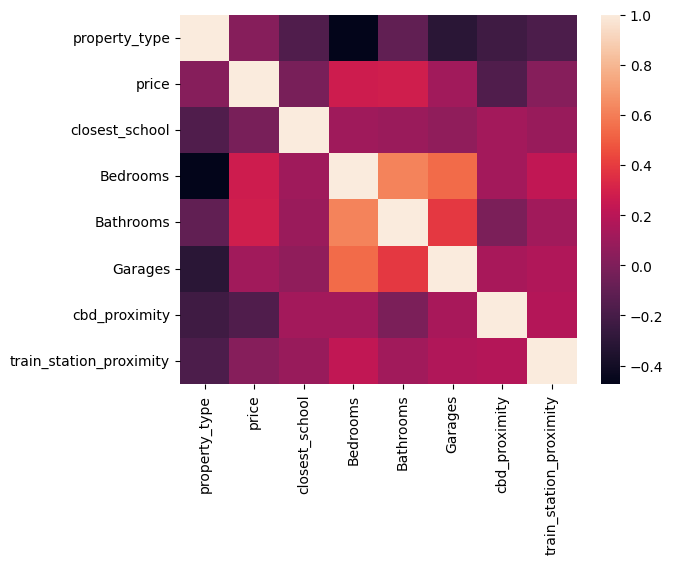

In [85]:
sns.heatmap(cormat)
plt.savefig('../plots/' + 'Pearson_Correlation_Heat_Map.png', bbox_inches='tight')

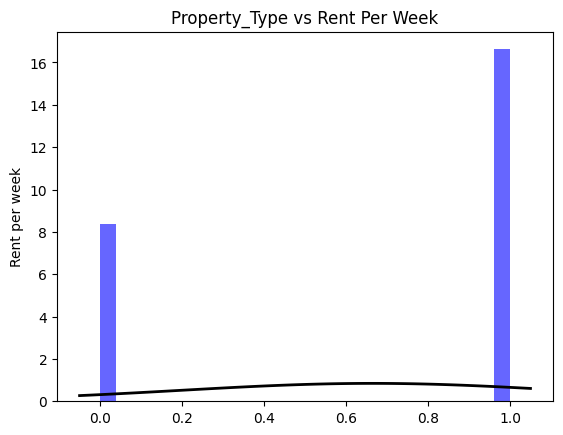

In [6]:
# Property Type vs Rent Per Week
mu, std = norm.fit(df.property_type) 
plt.hist(df.property_type, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label = "Property Type")
plt.title(title)
plt.ylabel('Rent per week')
plt.show()

# plt.savefig("Bedrooms vs Rent Per Week.png")



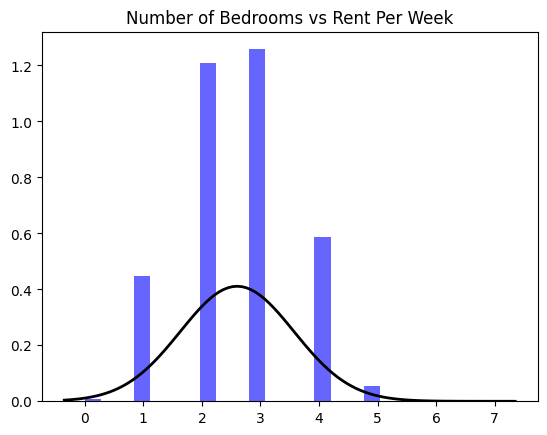

In [87]:
# Bedrooms vs Rent Per Week
mu, std = norm.fit(df.Bedrooms) 
plt.hist(df.Bedrooms, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Number of Bedrooms vs Rent Per Week"
plt.title(title)
  
plt.show()

# plt.savefig("Bedrooms vs Rent Per Week.png")



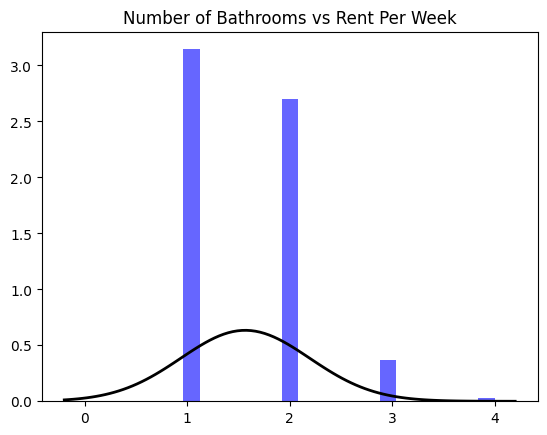

In [88]:
# Bathrooms vs Rent Per Week 

mu, std = norm.fit(df.Bathrooms) 
plt.hist(df.Bathrooms, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Number of Bathrooms vs Rent Per Week"
plt.title(title)
  
plt.show()

# plt.savefig("Bedrooms vs Rent Per Week.png")




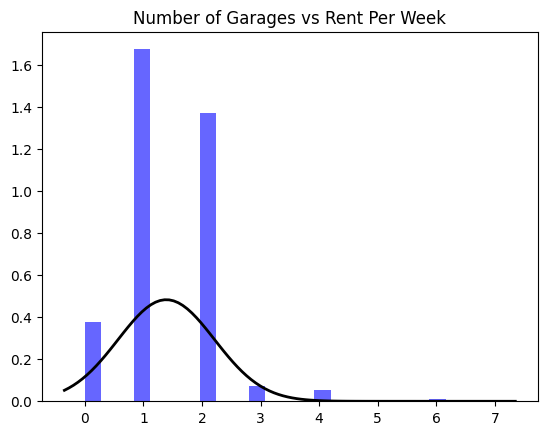

In [89]:
# Garages vs Rent Per Week 

mu, std = norm.fit(df.Garages) 
plt.hist(df.Garages, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Number of Garages vs Rent Per Week"
plt.title(title)
  
plt.show()

# plt.savefig("Bedrooms vs Rent Per Week.png")





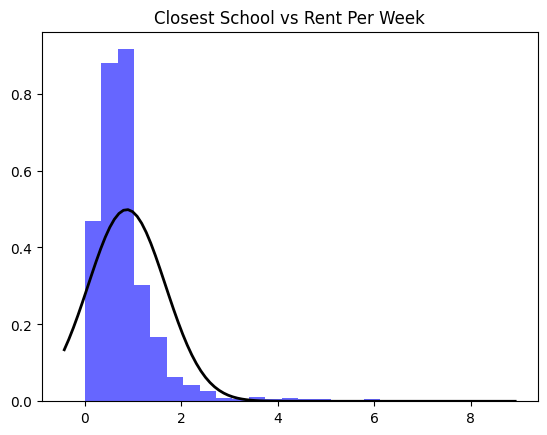

In [90]:
# Closest School vs Rent Per Week
mu, std = norm.fit(df.closest_school) 
plt.hist(df.closest_school, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Closest School vs Rent Per Week"
plt.title(title)
  
plt.show()

# plt.savefig("Bedrooms vs Rent Per Week.png")



# Linear Regression Model: useful tool for predicting a continuous response 

Best subset regression

This approach involves identifying a subset of the p predictors that
we believe to be related to the response. We then fit a model
using least squares on the reduced set of variables.

• To perform best subset selection, we fit a separate least
squares regression for each possible combination of the p
predictors.

• Forward Stepwise Selection and Backward Stepwise
Selection both search through p(p + 1)/2 models to identify
the best one.

In [91]:
df.head()

,property_link,suburb,address,property_type,price,closest_school,Bedrooms,Bathrooms,Garages,cbd_proximity,train_station_proximity
0,https://www.domain.com.au/14-curringa-ct-churc...,CHURCHILL VIC 3842,"14 Curringa Ct, CHURCHILL VIC 3842",0,320,1.0,3,1,0,163813.91,2000.000000
1,https://www.domain.com.au/31-suzanne-street-da...,DANDENONG VIC 3175,"31 Suzanne Street, DANDENONG VIC 3175",0,465,0.7,3,1,1,34286.29,2000.000000
2,https://www.domain.com.au/65-bruckner-drive-po...,POINT COOK VIC 3030,"65 Bruckner Drive, POINT COOK VIC 3030",0,420,1.3,4,2,2,29562.13,1767.277858
3,https://www.domain.com.au/16-june-square-ringw...,RINGWOOD NORTH VIC 3134,"16 June Square, RINGWOOD NORTH VIC 3134",0,620,0.5,3,2,6,28960.59,2000.000000
4,https://www.domain.com.au/1-76-mckean-street-b...,BOX HILL NORTH VIC 3129,"1/76 McKean Street, BOX HILL NORTH VIC 3129",0,620,0.7,4,2,1,21521.80,1569.175461


In [92]:
# Best Subset Regression 
x_columns = ["property_type", "Bedrooms", "Bathrooms", "Garages", "closest_school", "cbd_proximity", "train_station_proximity"]
y = df["price"]



In [93]:
# creating function to get model statistics
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()



                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              3606.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                        0.00
Time:                        06:54:00   Log-Likelihood:                         -19428.
No. Observations:                2981   AIC:                                  3.887e+04
Df Residuals:                    2974   BIC:                                  3.891e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [94]:
# Remove feature with alrgest p-value until all p-values are below 0.05
x_columns.remove("Garages")
get_stats()

# No 

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              4209.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                        0.00
Time:                        06:54:43   Log-Likelihood:                         -19428.
No. Observations:                2981   AIC:                                  3.887e+04
Df Residuals:                    2975   BIC:                                  3.890e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [96]:
# Add features back to check p-value 

x_columns = ["property_type", "Bedrooms", "Bathrooms", "Garages"]

def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              5994.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                        0.00
Time:                        06:55:54   Log-Likelihood:                         -19498.
No. Observations:                2981   AIC:                                  3.900e+04
Df Residuals:                    2977   BIC:                                  3.903e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [677]:
# Smallest AIC 
x_columns_step = ["Property_Type", "Bedrooms", "Bathrooms", "Garages"] 

